In [1]:
from datum import *
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import AffinityPropagation
import sys

/usr/local/lib/python2.7/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [5]:
date = np.load('date_list.npy')

In [9]:
rank_info = np.load('rank_info.npy')

In [13]:
eval_info = np.load('eval_info.npy')

In [15]:
stock_code = np.load('stock_code.npy')

In [39]:
stock_code[0]

600028

In [45]:
len(np.where((date >= '2016-01-01') & (date < '2017-01-01'))[0])

244

In [44]:
date[2613]

u'2016-01-04'

In [17]:
len(stock_code)

167

In [30]:
date[-10]

u'2017-01-12'

In [47]:
def get_data(start_date, end_date, stock_code):
    price_csv = pd.read_csv('/data/zhige_data/embedding_simpyear/stock_data/'+str(int(stock_code))+'_price.csv')
    dates = np.array(price_csv['TradingDay'])
    for count in range(len(dates)):
        dates[count] = int(''.join(str(dates[count]).split()[0].split('-')))
    select_index = np.where((dates >= start_date) & (dates < end_date))[0]
    return_price = np.array(price_csv['ClosePrice'][select_index])
    
    feature_csv = pd.read_csv('/data/zhige_data/embedding_simpyear/stock_data/'+str(int(stock_code))+'_feature.csv')
    dates = np.array(feature_csv['trading_day'])
    for count in range(len(dates)):
        dates[count] = int(''.join(str(dates[count]).split()[0].split('-')))
    select_index = np.where((dates >= start_date) & (dates < end_date))[0]
    return_feature = np.array(feature_csv)[select_index, 1:]  
    return return_price, return_feature

In [48]:
a, b = get_data(20160101, 20170101, 1)

In [50]:
b.dtype

dtype('O')

In [53]:
r.date

array([datetime.date(2004, 8, 19), datetime.date(2004, 8, 20),
       datetime.date(2004, 8, 23), ..., datetime.date(2008, 10, 10),
       datetime.date(2008, 10, 13), datetime.date(2008, 10, 14)],
      dtype=object)

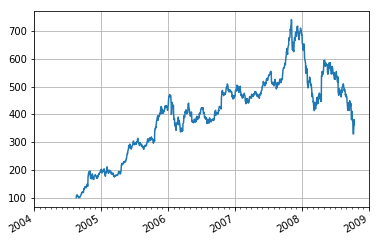

In [65]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('goog.npy')
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later.
    r = np.load(datafile, encoding='bytes').view(np.recarray)
except TypeError:
    r = np.load(datafile).view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)

# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price

ax.grid(True)


# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()